# Fool me twice(...)
## Is Fandango still inflating movie ratings?

![banner](https://www.theguesthouseocala.com/wp-content/uploads/2020/07/22-2.jpeg)

## Abstract

In October 2015, FiveThirtyEight's article on Fandango's biased movie rating system shook the company's image in the film industry. We take a closer look at what changed after that and compare their statistics to other 3 main competitors.

The results were as follows:

* Mode and mean fell from (4.5->4) and (4.09->3.89), respectively. 
* More sensibly, 'A' scores went from 45% to 27%. 
* their ratings still skewing a lot to the right ('optimistic')
* ratings distributions before and after the article are, indeed, significantly different
* Metascore is the closest to ideal: nearly normalized rating centered around the average, hard to score 5's and 0's

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>

Online movie ratings mean serious business in Hollywood. The american film industry produces around US$ 10 billion annually in the american box office, and such ratings aggregator websites probably weight considerably on the scale as to where this money goes. Gone are the days that a single movie critic could make or break a film, but thousands of reviewers combined, both amateurs and professionals, apparently still hold this power.

In October 2015, FiveThirtyEight [analyzed movie ratings data](https://fivethirtyeight.com/features/fandango-movies-ratings/) from the website Fandango and found compelling evidence suggesting they were inflating the rating numbers. The rounding on their rating scale from 0-5 stars was always to the nearest half star ABOVE the actual rating, instead of rounding to the nearest valid score on their website. Not only that, for 8 % of the cases, the rouding up was done to the nearest whole start (4.5 stars woud become 5).

Consider also that there was no global rating lower than 3 stars for movie releases from that year, for all the 209 movies with more than 30 reviews. The overestimation became even clearer comparing to Fandango's major competitors: they were around the same ball park, averaging 75-80% of their movies with a rating half a start lower. And while the competitors pretend to have distant relations with the media industry - I said pretend!, Fandango itself is a NBCUniversal subsidiary that actually sells tickets to the movies on which it offers reviews, so that definitely adds to the bigger picture.

Fandango replied at the time it was a glitch on their website that caused these discrepancies, and indeed rounding up was not an issue on their app - which still doesn't explain the global minimum of 3 stars and consistent higher rating compared to its pairs. However, they claimed they would fix this bug right away, and now, but did they really?

## 2. Goals, scope and limitations<a name="section2"></a>

Scope:
The population of interest for our analysis comprises all the movie ratings stored on Fandango's website, regardless of the releasing year.

Since comparing before and after FiverThirtyEight's article, we are interested in sampling the population at these two different periods (before/after Oct 2015)

Limitations:
1. We only have data for 'popular movies', i.e., movies that had a minimum number of reviews depending on that definition by two different data sources. 

2. We only have data for two very restrictive time periods:movies that have had tickets on sale in 2014/15; movies that were released between 2016/17. These restrictive periods allow for temporal trends (the movies might have been extremely good during these two short periods).

3. It is not clear which Nonparametric Statistical hypothesis test would be the best for this project. There seems to be limitations depending on whether the data is continuous or discrete, but we found no restrictions with the Mann-Whitney U Test.

These limitations make the sampling unrepresentative for our generalistic goals, and so we must narrow our scope only to popular movies as well in order to be able to use the same data: 

Delimited goals:

* Determine whether there's any difference between Fandango's ratings for popular movies in 2014/15 and Fandango's ratings for popular movies in 2016/17, following FiveThirtyEight's article; 

* Compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating.

## 3. Methodology<a name="section3"></a>

We'll analyze both datasets with pandas, matplotlib and seaborn. For the first goal, we'll use kernel distribution, bar plots of before and after for each possible rating (0-5 starts, for every 0.5 start) and compare the median, mean and mode for both 'Before' and 'After'.

We'll also deploy scipy.stats in the Mann-Whitney U Test to compare the ratings distributions from before and after the article to see if they are significantly different.

For comparing the most reliable movie rating aggregator, we will compare their ratings' distributions, trying to find the one closest to a normal distribution.

## 4. Metadata<a name="section4"></a>

For the FiveThirtyEight report data, the reporter, Walt Hickey, made it available [on Github](https://github.com/fivethirtyeight/data/tree/master/fandango).

<table>
<thead>
<tr>
<th>Column</th>
<th>Definition</th>
</tr>
</thead>
<tbody>
<tr>
<td>FILM</td>
<td>The film in question</td>
</tr>
<tr>
<td>RottenTomatoes</td>
<td>The Rotten Tomatoes Tomatometer score  for the film</td>
</tr>
<tr>
<td>RottenTomatoes_User</td>
<td>The Rotten Tomatoes user score for the film</td>
</tr>
<tr>
<td>Metacritic</td>
<td>The Metacritic critic score for the film</td>
</tr>
<tr>
<td>Metacritic_User</td>
<td>The Metacritic user score for the film</td>
</tr>
<tr>
<td>IMDB</td>
<td>The IMDb user score for the film</td>
</tr>
<tr>
<td>Fandango_Stars</td>
<td>The number of stars the film had on its Fandango movie page</td>
</tr>
<tr>
<td>Fandango_Ratingvalue</td>
<td>The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.</td>
</tr>
<tr>
<td>RT_norm</td>
<td>The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system</td>
</tr>
<tr>
<td>RT_user_norm</td>
<td>The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system</td>
</tr>
<tr>
<td>Metacritic_norm</td>
<td>The Metacritic critic score for the film, normalized to a 0 to 5 point system</td>
</tr>
<tr>
<td>Metacritic_user_nom</td>
<td>The Metacritic user score for the film, normalized to a 0 to 5 point system</td>
</tr>
<tr>
<td>IMDB_norm</td>
<td>The IMDb user score for the film, normalized to a 0 to 5 point system</td>
</tr>
<tr>
<td>RT_norm_round</td>
<td>The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star</td>
</tr>
<tr>
<td>RT_user_norm_round</td>
<td>The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star</td>
</tr>
<tr>
<td>Metacritic_norm_round</td>
<td>The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star</td>
</tr>
<tr>
<td>Metacritic_user_norm_round</td>
<td>The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star</td>
</tr>
<tr>
<td>IMDB_norm_round</td>
<td>The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star</td>
</tr>
<tr>
<td>Metacritic_user_vote_count</td>
<td>The number of user votes the film had on Metacritic</td>
</tr>
<tr>
<td>IMDB_user_vote_count</td>
<td>The number of user votes the film had on IMDb</td>
</tr>
<tr>
<td>Fandango_votes</td>
<td>The number of user votes the film had on Fandango</td>
</tr>
<tr>
<td>Fandango_Difference</td>
<td>The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue</td>
</tr>
</tbody>
</table>

For the latter data, we can obtain it from a dataquest student profile also [on Github](https://github.com/mircealex/Movie_ratings_2016_17)

<table>
<thead>
<tr>
<th>Column</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>movie</td>
<td>the name of the movie</td>
</tr>
<tr>
<td>year</td>
<td>the release year of the movie</td>
</tr>
<tr>
<td>metascore</td>
<td>the Metacritic rating of the movie (the "metascore" - critic score)</td>
</tr>
<tr>
<td>imdb</td>
<td>the IMDB rating of the movie (user score)</td>
</tr>
<tr>
<td>tmeter</td>
<td>the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)</td>
</tr>
<tr>
<td>audience</td>
<td>the Rotten Tomatoes rating of the movie (user score)</td>
</tr>
<tr>
<td>fandango</td>
<td>the Fandango rating of the movie (user score)</td>
</tr>
<tr>
<td>n_metascore</td>
<td>the metascore normalized to a 0-5 scale</td>
</tr>
<tr>
<td>n_imdb</td>
<td>the IMDB rating normalized to a 0-5 scale</td>
</tr>
<tr>
<td>n_tmeter</td>
<td>the tomatometer normalized to a 0-5 scale</td>
</tr>
<tr>
<td>n_audience</td>
<td>the Rotten Tomatoes user score normalized to a 0-5 scale</td>
</tr>
<tr>
<td>nr_metascore</td>
<td>the metascore normalized to a 0-5 scale and rounded to the nearest 0.5</td>
</tr>
<tr>
<td>nr_imdb</td>
<td>the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5</td>
</tr>
<tr>
<td>nr_tmeter</td>
<td>the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5</td>
</tr>
<tr>
<td>nr_audience</td>
<td>the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5</td>
</tr>
</tbody>
</table>

## 5. Data Exploration and Transformation<a name="section5"></a>

0. unwanted columns and reasonableness
1. Are the samples really popular?
2. Check for data type;
3. missing/repeated data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('ratings_16_17.csv')

In [2]:
#0. unwanted columns and reasonableness 
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [3]:
#0. unwanted columns and reasonableness 
before['Year'] = (before['FILM'].str[-5:-1]).astype(int)
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2015


In [4]:
#0. unwanted columns and reasonableness 
after.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [5]:
#0. unwanted columns and reasonableness 
after.sample(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
191,The Perfect Match,2016,41,4.8,27,45,4.0,2.05,2.40,1.35,2.25,2.0,2.5,1.5,2.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
138,Rings,2017,25,4.5,6,28,3.0,1.25,2.25,0.30,1.40,1.0,2.0,0.5,1.5
77,In a Valley of Violence,2016,64,6.0,76,54,4.0,3.20,3.00,3.80,2.70,3.0,3.0,4.0,2.5
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0


In [6]:
#0. unwanted columns and reasonableness
before_important = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference', 'Year']]
after_important = after[['movie', 'year', 'fandango']]

In [7]:
#0. unwanted columns and reasonableness
before_important.describe(include='all')

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
count,146,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN
top,Avengers: Age of Ultron (2015),NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.089041,3.845205,3848.787671,0.243836,2014.883562
std,NaN,0.540386,0.502831,6357.778617,0.152665,0.321854
min,NaN,3.000000,2.700000,35.000000,0.000000,2014.000000
25%,NaN,3.500000,3.500000,222.250000,0.100000,2015.000000
50%,NaN,4.000000,3.900000,1446.000000,0.200000,2015.000000
75%,NaN,4.500000,4.200000,4439.500000,0.400000,2015.000000


In [8]:
#0. unwanted columns and reasonableness
after_important.describe(include='all')

,movie,year,fandango
count,214,214.000000,214.000000
unique,214,NaN,NaN
top,10 Cloverfield Lane,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2016.107477,3.894860
std,NaN,0.310444,0.516781
min,NaN,2016.000000,2.500000
25%,NaN,2016.000000,3.500000
50%,NaN,2016.000000,4.000000
75%,NaN,2016.000000,4.500000


As we can see, the minimum ranking is still considerably high, at 50%, as if to say 'there are no bad movies'. This is a strong indication there is still bias in the data.

In [9]:
#0. unwanted columns and reasonableness
before_important['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
#0. unwanted columns and reasonableness 
after_important['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

It is okay to have data from 2014 to 2017 according to our scope. It does not hurt the idea of results immediately before and after the critical article, it actually dilutes the seasonal trend liability by expanding the sample by roughly 15%.

In [11]:
#0. unwanted columns and reasonableness 
after_important['fandango'].value_counts(dropna=False)

4.0    82
4.5    57
3.5    50
3.0    18
2.5     6
5.0     1
Name: fandango, dtype: int64

In [12]:
before_important['Fandango_Stars'].value_counts( dropna=False)

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64

In [13]:
#1. Are the samples really popular?
after_important.sample(10, random_state=1)
popularity = {'movie': ['Mechanic: Resurrection', 'Warcraft',
                        'Max Steel', 'Me Before You',
                        'Fantastic Beasts and Where to Find Them',
                        'Cell', 'Genius', 'Sully',
                        'A Hologram for the King', 
                        'Captain America: Civil War'
                       ],
              'pop': [2247, 7271,493, 5263, 13400, 17, 127, 11877, 500, 35057]}

pop = pd.DataFrame.from_dict(popularity)
pop
merged = pd.merge(left = after_important, right=pop, on='movie').set_index('movie')
merged

,year,fandango,pop
movie,,,
A Hologram for the King,2016,3.0,500
Captain America: Civil War,2016,4.5,35057
Cell,2016,3.0,17
Fantastic Beasts and Where to Find Them,2016,4.5,13400
Genius,2016,3.5,127
Max Steel,2016,3.5,493
Me Before You,2016,4.5,5263
Mechanic: Resurrection,2016,4.0,2247
Sully,2016,4.5,11877


We use a random seed of 1, as is good practice to show we are not just trying a suitable random sample. As of April 2018, these are the fan ratings we find, merged in the table above. 90% of the movies in our sample are popular -except for "Cell". This is enough to move forward confidently. Let's check the same parameter on the 'before' dataset.

In [14]:
#1. Are the samples really popular?
sum(before_important['Fandango_votes']<30)

0

For the data on movies prior to the article, all entries in our data can be considered popular movies.

In [15]:
#2 Check for data type;
before_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
 5   Year                  146 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 6.4+ KB


In [16]:
#2. Check for data type;
after_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


Things are fine when it comes to data type

In [17]:
#3. missing/repeated data
print('before duplicated: '+ str(sum(before_important.duplicated())) + '\n' + 'after duplicated: ' + str(sum(after_important.duplicated())) )

before duplicated: 0
after duplicated: 0


Text(0.5, 23.38159722222222, 'Columns')

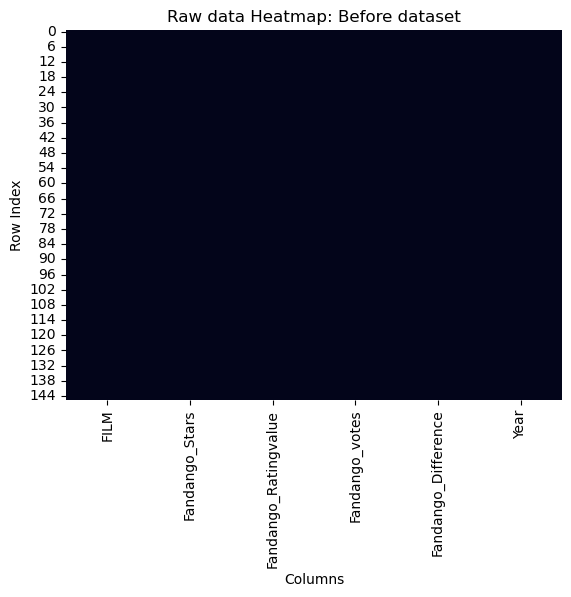

In [18]:
#3. missing/repeated data
sns.heatmap(before_important.isnull(), cbar=False)
plt.title('Raw data Heatmap: Before dataset')
plt.ylabel('Row Index')
plt.xlabel('Columns')

Text(0.5, 23.52222222222222, 'Columns')

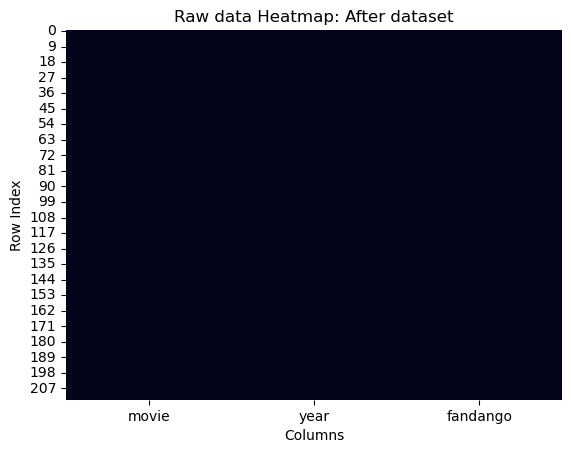

In [19]:
#3. missing/repeated data
sns.heatmap(after_important.isnull(), cbar=False)
plt.title('Raw data Heatmap: After dataset')
plt.ylabel('Row Index')
plt.xlabel('Columns')

Our dataset looks solid: There is no missing nor repeated data, thus, no transformation is required.

Summing up:

0. relevant columns: we only keep data pertaining to Fandango reviews: 
* Before: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference';
* After: 'movie', 'year', 'fandango'.
1. are they really popular: from a random sampling of the 'after' data, 90% was popular, while all 'before' data checks that box.
2. Data types: all proper;
3. Missing/repeated data: nothing out of order.

## 6. Data Visualization and Analysis<a name="section6"></a>

1. Comparing distributions Shapes for Before and After
2. Comparing relative frequencies
3. Determining the Direction of the Change
4. Are the data distributions signifficantly different?
5. Finding the best movie rating aggregator website

### 6.1 Comparing distributions Shapes for Before and After

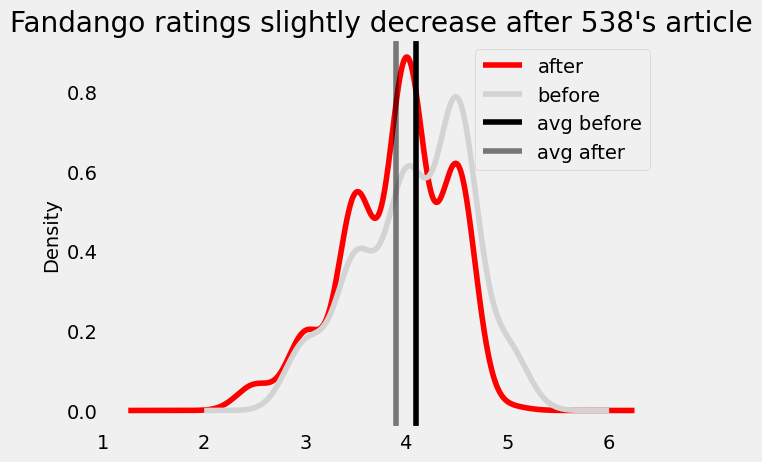

In [20]:
plt.style.use('fivethirtyeight')

merged_rating = pd.merge(left=after_important['fandango'], right= before_important['Fandango_Stars'], how='left', left_index=True, right_index=True).rename({'Fandango_Stars':'before', 'fandango':'after'}, axis=1)
merged_rating.sort_index().plot.kde(color=['r', 'lightgray'], grid=False)
plt.axvline(merged_rating['before'].mean(), color='black', label='avg before', alpha=1)
plt.axvline(merged_rating['after'].mean(), color='Black', label='avg after', alpha=0.5)

plt.title("Fandango ratings slightly decrease after 538's article")
plt.legend()
#plt.xlim([0,5])
#plt.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()


The 'Before' distribution has a mean (4.08) slightly higher than 'After's (3.89), but not by much. We can see the kernel distribution is unclear about the rates' ranges: the minimum at 'Before' was 3 peaking at 5, while the minimun in 'After' was 2.5 peaking at 5.

The shapes are somewhat similar, but we can see 'After' has more values concentrated around the mean, compared to 'Before'.

By all available metrics, the 'After' movies are rated lower compared to 'Before', but by a very thin margin.

## 6.2 Comparing relative frequencies

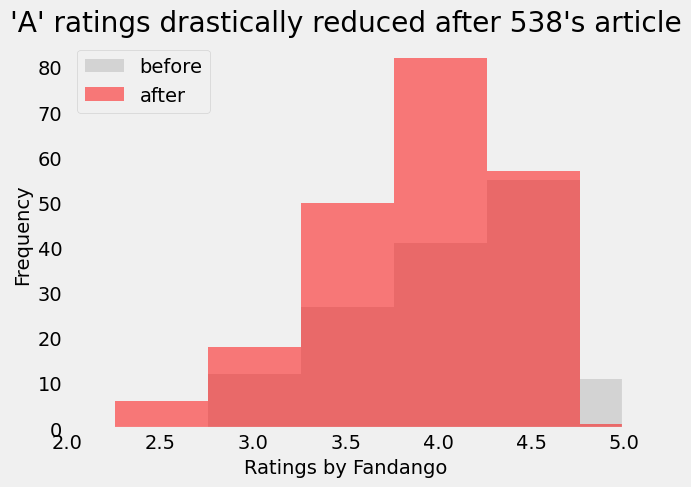

In [21]:
#Examining frequency tables for both periods:

b_n = round(before['Fandango_Stars'].value_counts(normalize=True).sort_index()*100, 2)
a_n = round(after['fandango'].value_counts(normalize=True).sort_index()*100, 2)

# merged = pd.merge(left=a_n, right=b_n, left_index=True, right_index=True, how='left').rename({'Fandango_Stars': 'Before', 'fandango': 'After'}, axis=1)
# merged.plot.hist(bins = 10, range = (0,5), align = 'left')
before_important['Fandango_Stars'].plot.hist(bins = 10, range = (0,5.01), align = 'right', label='before', color='lightgray')
after_important['fandango'].plot.hist(bins = 10, range = (0,5.01), align = 'right', alpha=0.5, label='after', color='red')
plt.legend()
plt.xlim([2,5])
plt.grid(False)
plt.xlabel('Ratings by Fandango')
plt.title("'A' ratings drastically reduced after 538's article")
plt.show()

In the After data, there were way fewer movies in the very high ratings range (4.5-5 stars): Before 45% vs 27% After.

The minimum rating is also lower in the After dataset: 2.8% were rated as 2.5 stars, whereas the minimum before was 3 starts. There is a tangible difference in the 2 distributions that the table better represents here rather than the kernel: this, again, is an iterated proxy for the real distribution.

Naturally, if there is less data in After for higher scores, there will be more of it in the lower scores, as we can observe from 2.5 to 4 stars ratings.

### 6.3 Determining the Direction of the Change



In [22]:
mean_b = round(before_important['Fandango_Stars'].mean(), 2)
mean_a = round(after_important['fandango'].mean(), 2)
median_b = round(before_important['Fandango_Stars'].median(), 2)
median_a = round(after_important['fandango'].median(), 2)
mode_b = round(before_important['Fandango_Stars'].mode()[0], 2)
mode_a = round(after_important['fandango'].mode()[0], 2)

comp = pd.DataFrame()
comp['Before'] = [mean_b, median_b, mode_b]
comp['After'] = [mean_a, median_a, mode_a]
comp.index = ['mean', 'median', 'mode']

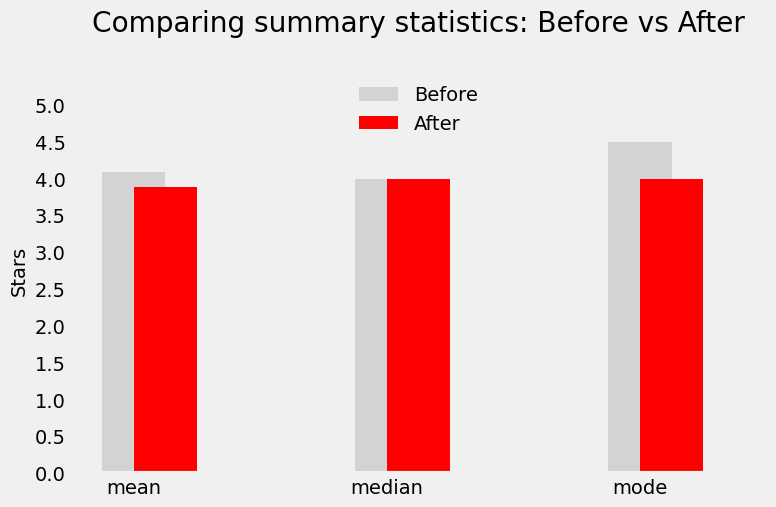

In [23]:
comp['Before'].plot.bar(color = 'lightgray', align = 'center', label = 'Before', width = .25)
comp['After'].plot.bar(color = 'red', align = 'edge', label = 'After', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: Before vs After', y = 1.07)
plt.ylim(0,5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.grid(False)
plt.show()

In [24]:
(comp.loc['mean'][0] - comp.loc['mean'][1]) / comp.loc['mean'][0]

0.04889975550122243

The mean rating droppen nearly 4% after the article, whereas the mode became 4 from 4.5 (11.1%). So there is a slight change in direction towards downgrading popular movies, but not very significant.

### 6.4 Are these two distributions significantly different?

We can deploy the [Mann-Whitney U test](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/),adopting an alpha of 0.05 as a threshold for p-value. (It assumes observations are independent and identically distributed, and that they also can be ranked).

In [25]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(before_important['Fandango_Stars'], after_important['fandango'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=18714.000, p=0.001
Probably different distributions


The Mann-Whitney U test shows a p-value 50x smaller than our alpha, which rejects the null hypothesis of both before and after distributions being statistically the same. This proves that the two discrete distributions are significantly different, as we could testify from the general statistics we plotted above.

### 6.5 Finding the best movie rating aggregator website

This is a subjective approach. The author of [this post](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19) argues for the ideal being a normal distribution of scores, where half of movies are below average, and therefore, not worth watching. We'll use his threshold to compare both data below, for both before and after:

In [26]:
before_compare = before[['FILM', 'IMDB_norm_round', 'RT_norm_round', 'Metacritic_norm_round', 'Fandango_Stars']].rename({'FILM':'movie', 'RT_norm_round': 'rotten_tomatoes','Metacritic_norm_round':'metascore',
                                                      'IMDB_norm_round': 'imdb', 'Fandango_Stars':'fandango'}, axis=1)
after_compare = after.iloc[:, [0, -4, -3, -2 ,6]].rename({'nr_metascore': 'metascore', 'nr_imdb':'imdb', 
                                                       'nr_tmeter': 'rotten_tomatoes', 'fandango':'fandango'}, axis=1)

full_data = pd.concat([after_compare, before_compare])

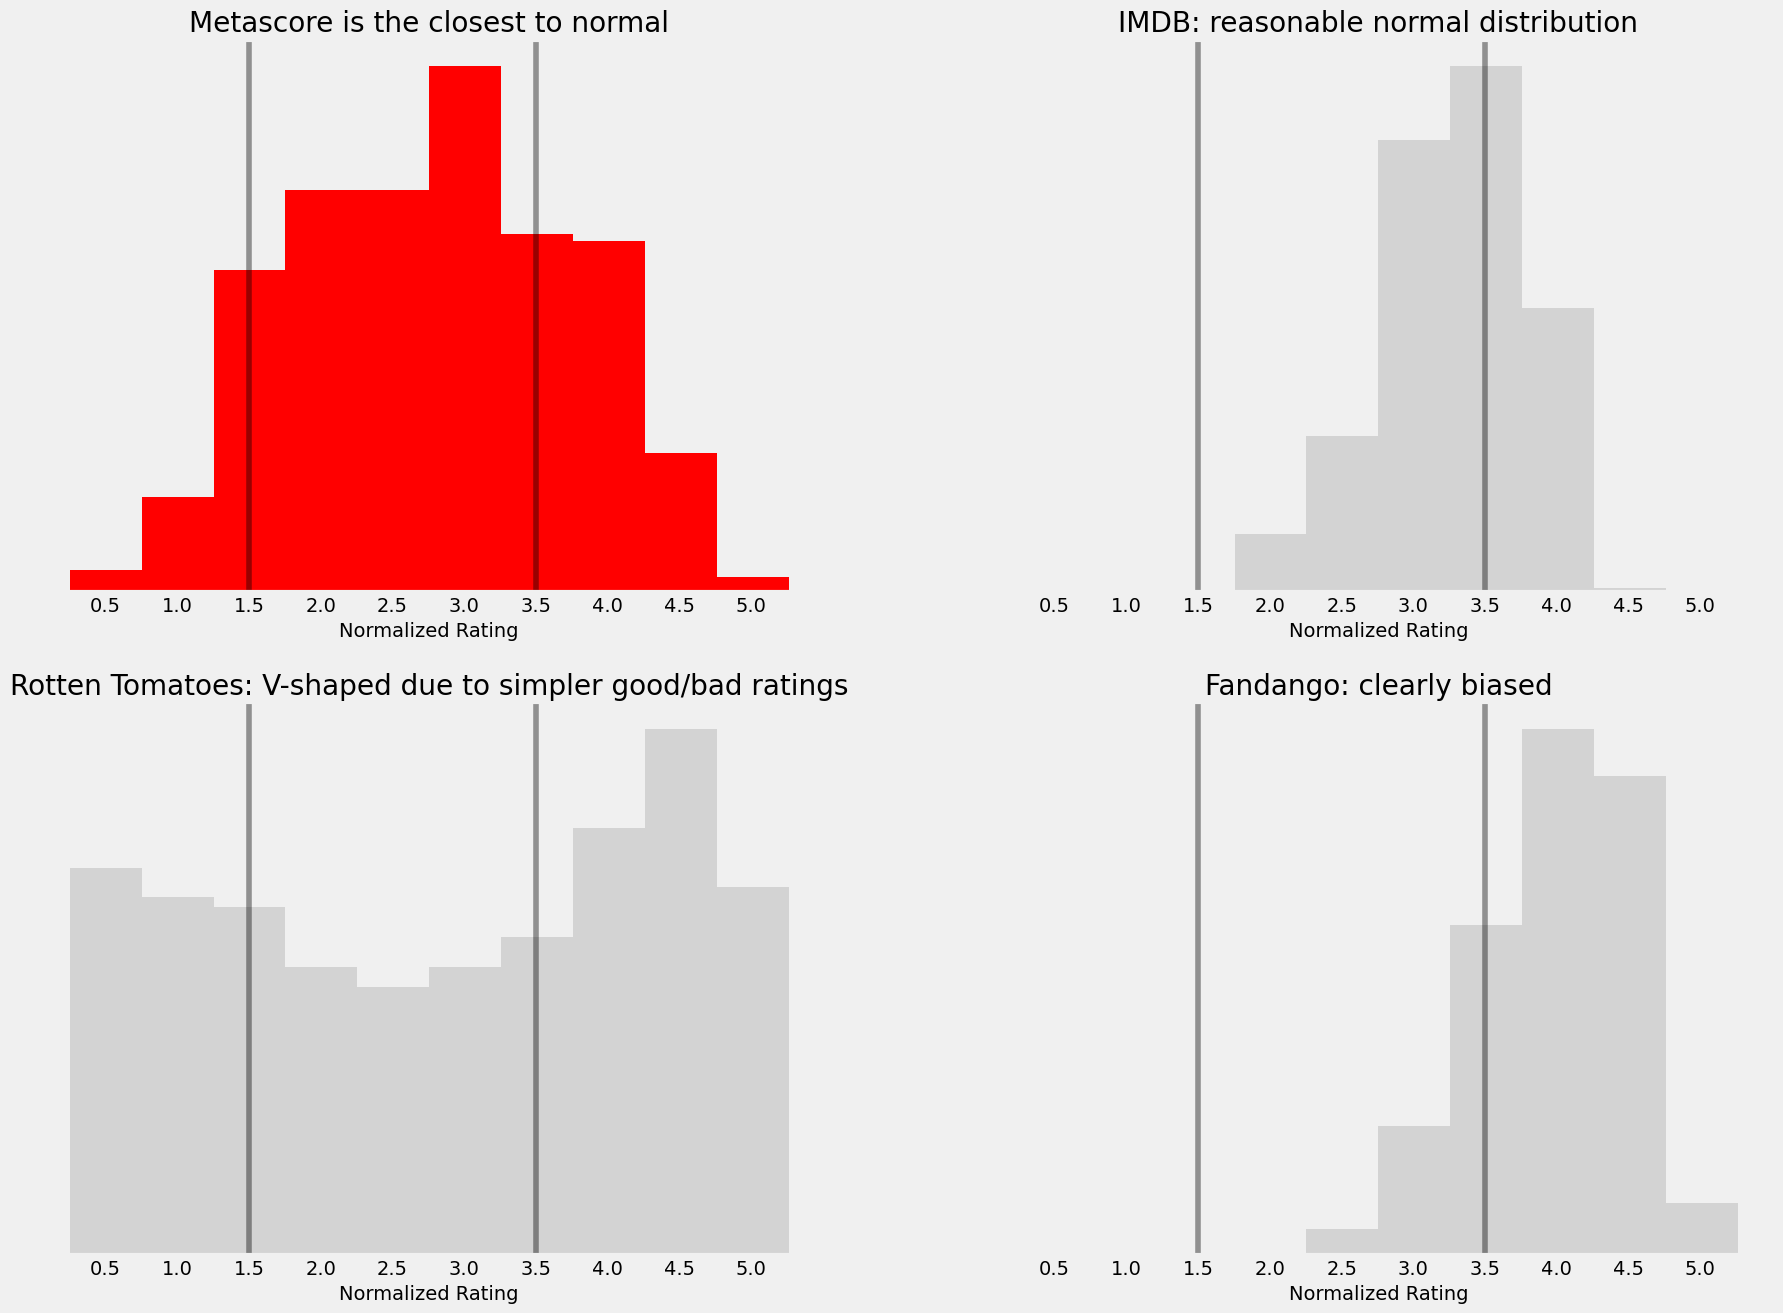

In [27]:
fig, axs = plt.subplots(2,2,figsize=(20,15))

axs[0,0].hist(full_data['metascore'], bins = 10, range = (0,5.01), align = 'right', density=True, color=['r'])
axs[0,0].set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axs[0,0].set_yticks([])
axs[0,0].set_xlabel('Normalized Rating')
axs[0,0].set_title('Metascore is the closest to normal')
axs[0,0].axvline(1.5, color='black', alpha = 0.4)
axs[0,0].axvline(3.5, color='black', alpha = 0.4)
axs[0,0].grid(False)

axs[0,1].hist(full_data['imdb'], bins = 10, range = (0,5.01), align = 'right', color='lightgray')
axs[0,1].set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axs[0,1].set_yticks([])
axs[0,1].set_xlabel('Normalized Rating')
axs[0,1].set_title('IMDB: reasonable normal distribution')
axs[0,1].axvline(1.5, color='black', alpha = 0.4)
axs[0,1].axvline(3.5, color='black', alpha = 0.4)
axs[0,1].grid(False)

axs[1,0].hist(full_data['rotten_tomatoes'], bins = 10, range = (0,5.01), align = 'right', color='lightgray')
axs[1,0].set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axs[1,0].set_xlabel('Normalized Rating')
axs[1,0].set_yticks([])
axs[1,0].set_title('Rotten Tomatoes: V-shaped due to simpler good/bad ratings')
axs[1,0].axvline(1.5, color='black', alpha = 0.4)
axs[1,0].axvline(3.5, color='black', alpha = 0.4)
axs[1,0].grid(False)

axs[1,1].hist(full_data['fandango'], bins = 10, range = (0,5.01), align = 'right', color='lightgray')
axs[1,1].set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axs[1,1].set_yticks([])
axs[1,1].set_xlabel('Normalized Rating')
axs[1,1].set_title('Fandango: clearly biased')
axs[1,1].axvline(1.5, color='black', alpha = 0.4)
axs[1,1].axvline(3.5, color='black', alpha = 0.4)
axs[1,1].grid(False)

plt.show()

From the histograms above, we can see that Metascore has the closes distribution to what would be considered ideal. IMDB can also be recommended, as its distribution is only slightly skewed to the right and it is very hard to get an excellent grade. There is something to the notion that even a bad movie can't be extremely low-graded, for it is still a piece of work that many agreed to work on for which there is a public. So maybe tilting it a bit to the bright side is not all wrong.

Rotten Tomatoes has its distribution in a V-shape/uniform distribution due to its rating system apparently simpler, consisting of only 'Good' vs 'Bad'. We plot Fandango to enable comparisons, but we can clearly put in perspective their bias towards over-rating movies.

## 7. Conclusion<a name="section7"></a>

We could observe that Fandango downgraded their ratings slightly after FiveThrityEight's article, as it shows from both mode (4.5->4) and mean(4.09->3.89) decreases. The most sensible change was the drop in top ratings(4.5-5), which fell from 45% to 27% of total movies. However, their ratings still skewing a lot to the right and assume all movies are worth watching, which raises many eyebrows. The two datasets are signifficantly different considering the ratings distributions before and after the article.

The website closest to what would be ideal is metascore, given its nearly normalized rating distribution centered around the average, being difficult to knock a home-run but also to flunk completely.

Next steps:

* Collect recent movie ratings data and formulate your own research questions. You can take a look [at this blog post](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19) to learn how to scrape movie ratings for IMDB and Metacritic.